In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.odr import *
import scipy.stats
from matplotlib.ticker import FormatStrFormatter

In [2]:
# uncertainties
x_delta = 0.0005 # m from the precision of the increments
y_delta = 0.0005 # V from the fluctuation of data

In [3]:
def sine(x, a, b, c, d):
    return a*np.sin(b*(x+c))+d

# Comparison of Waveguide Wavelengths
Using Experiments 1,2,3 and 4. This script aims to compare the waveguide wavelength generated using different terminations.
## Experiment 1: Standing Waves
In this experiment, 4 different terminations are used:
- Short Circuit (Blank)
- Open Circuit (No Temination)
- Matched Load
- Stub Stuner
Through sliding the detector probe and taking amplitude readings, a plot of the wave can be generated. Through identifying the maxima and minima of each waves, the wavelength and voltage standing wave ratio (VSWR) can be further determined. Where the VSWR is defined as, $$\text{VSWR}=\frac{\text{E}_{\text{max}}}{\text{E}_{\text{min}}}=\sqrt{\frac{\text{R}_{\text{max}}}{\text{R}_{\text{min}}}}$$
### Short Circuit and Open Circuit


In [4]:
# import data
# short circuit
exp1_short = np.genfromtxt('exp1_short_circuit.txt', skip_header = 1)
x_short = exp1_short[:,0]/100 # position of the detector in m
y_short = np.abs(exp1_short[:,1])/1000 # amplitude of square wave in V

# open circuit
exp1_open = np.genfromtxt('exp1_open_circuit.txt', skip_header = 1)
x_open = exp1_open[:,0]/100 # position of the detector in m
y_open = np.abs(exp1_open[:,1])/1000 # amplitude of square wave in V

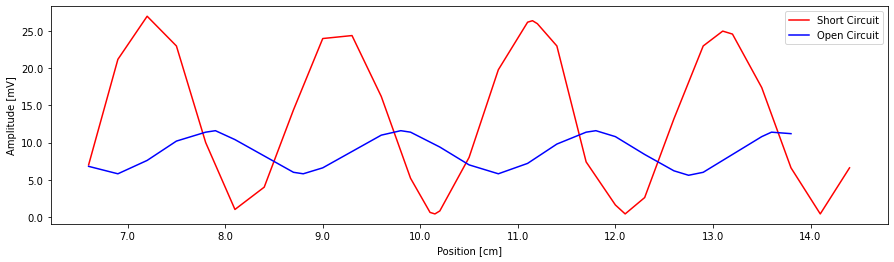

In [5]:
# plot position vs amplitude graph 
# for short and open circuit on the same graph
fig, ax = plt.subplots(figsize=(15, 4))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f')) # set number of decimal places
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.plot(x_short*100, y_short*1000, color='red', label='Short Circuit') # plot graph for short circuit
plt.plot(x_open*100, y_open*1000, color='blue', label='Open Circuit') # plot graph for open circuit
plt.xlabel("Position [cm]") # x-axis label
plt.ylabel("Amplitude [mV]") # y-axis label
plt.legend()

The above graph provides a rough estimate for the parameters needed for the sine curve fitting.

The parameters for the short circuit are:  [ 1.28326578e-02  3.20724065e+02 -4.76992419e-02  1.34124338e-02]
The parameters for the open circuit are:  [ 2.84358065e-03  3.19134152e+02 -5.36525741e-02  8.70377962e-03]


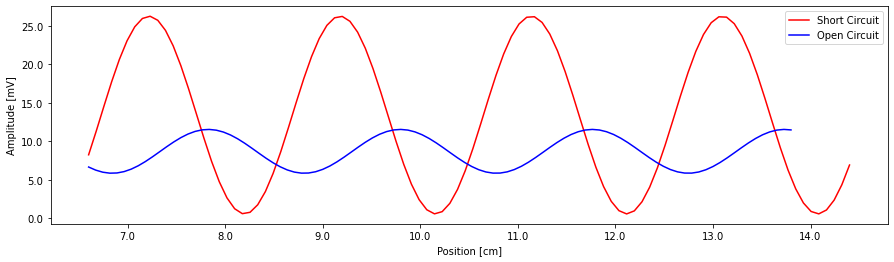

In [6]:
# find parameters for sine fitting
params_short, params_covariance_short = optimize.curve_fit(sine, x_short, y_short, p0=[(max(y_short)-min(y_short))/2, 2*np.pi/0.02, -0.05, -0.015])
params_open, params_covariance_open = optimize.curve_fit(sine, x_open, y_open, p0=[(max(y_open)-min(y_open))/2, 2*np.pi/0.02, -0.05, -0.008])

print("The parameters for the short circuit are: ", params_short)
print("The parameters for the open circuit are: ", params_open)

# plot the fitted sine curve with data
fig, ax = plt.subplots(figsize=(15, 4)) # increase horizontal width
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f')) # set number of decimal places
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#plt.errorbar(x_short*100, y_short*1000, xerr=x_delta*100, yerr=y_delta*1000, fmt='.', color='red')
#plt.errorbar(x_open*100, y_open*1000, xerr=x_delta*100, yerr=y_delta*1000, fmt='.', color='blue')

# using a larger number of spaces in between points plot the sine fit
plt.plot(np.linspace(0.066, 0.144, num=100)*100, sine(np.linspace(0.066, 0.144, num=100), params_short[0], params_short[1], params_short[2], params_short[3])*1000, color='red', label='Short Circuit')
plt.plot(np.linspace(0.066, 0.138, num=100)*100, sine(np.linspace(0.066, 0.138, num=100), params_open[0], params_open[1], params_open[2], params_open[3])*1000, color='blue', label='Open Circuit')
plt.xlabel("Position [cm]") # x-axis label
plt.ylabel("Amplitude [mV]") # y-axis label
plt.legend()

### Matched Load and Stub Tuner

In [7]:
# import data
# matched load
exp1_load = np.genfromtxt('exp1_matched_load.txt', skip_header = 1)
x_load = exp1_load[:,0]/100 # position of the detector in m
y_load = np.abs(exp1_load[:,1])/1000 # amplitude of square wave in V

# stub tuner
exp1_tuner = np.genfromtxt('exp1_stub_tuner.txt', skip_header = 1)
x_tuner = exp1_tuner[:,0]/100 # position of the detector in m
y_tuner = np.abs(exp1_tuner[:,1])/1000 # amplitude of square wave in V

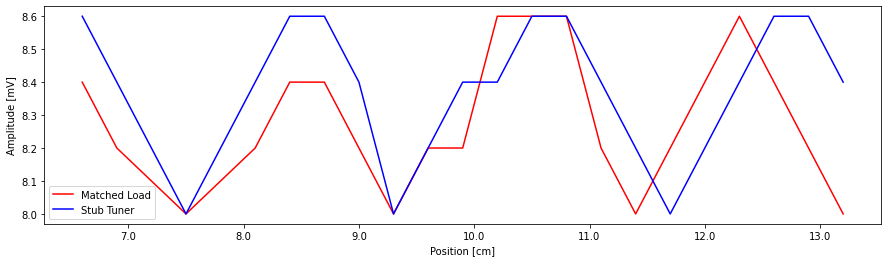

In [8]:
# plot position vs amplitude graph 
# for short and open circuit on the same graph
fig, ax = plt.subplots(figsize=(15, 4))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f')) # set number of decimal places
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.plot(x_load*100, y_load*1000, color='red', label='Matched Load') # plot graph for short circuit
plt.plot(x_tuner*100, y_tuner*1000, color='blue', label='Stub Tuner') # plot graph for open circuit
plt.xlabel("Position [cm]") # x-axis label
plt.ylabel("Amplitude [mV]") # y-axis label
plt.legend()

The parameters for the matched load are: [ -0.00032126450968733344 262.68392256395845 -0.06964810275773453 0.008301616400831007 ]
The parameters for the stub tuner are: [ -0.0003224491050843723 282.611985076145 -0.04930628795514648 0.008303862843810244 ]


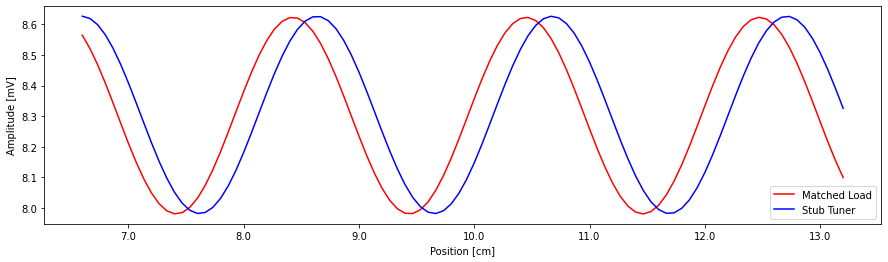

In [9]:
# find parameters for sine fitting
params_load, params_covariance_load = optimize.curve_fit(sine, x_load, y_load, p0=[(max(y_load)-min(y_load))/2, 2*np.pi/0.03, -0.05, 0])
params_tuner, params_covariance_tuner = optimize.curve_fit(sine, x_tuner, y_tuner, p0=[(max(y_tuner)-min(y_tuner))/2, 2*np.pi/0.02, -0.05, -0.008])

print("The parameters for the matched load are: [", params_load[0]-0.00008, params_load[1]-57, params_load[2], params_load[3]+0.00003, "]")
print("The parameters for the stub tuner are: [", params_tuner[0]-0.00005, params_tuner[1]-16, params_tuner[2]-0.001, params_tuner[3]-0.00005, "]")
# due to insufficient data, parameters had to be adjusted to find the best sine fit


# plot the fitted sine curve with data
fig, ax = plt.subplots(figsize=(15, 4)) # increase horizontal width
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f')) # set number of decimal places
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#plt.errorbar(x_load*100, y_load*1000, xerr=x_delta, yerr=y_delta, fmt='.', color='red')
#plt.errorbar(x_tuner*100, y_tuner*1000, xerr=x_delta, yerr=y_delta, fmt='.', color='blue')

# using a larger number of spaces in between points plot the sine fit
plt.plot(np.linspace(0.066, 0.132, num=100)*100, sine(np.linspace(0.066, 0.144, num=100), params_load[0]-0.00008, params_load[1]-57, params_load[2], params_load[3]+0.00003)*1000, color='red', label='Matched Load')
plt.plot(np.linspace(0.066, 0.132, num=100)*100, sine(np.linspace(0.066, 0.138, num=100), params_tuner[0]-0.00005, params_tuner[1]-16, params_tuner[2]-0.001, params_tuner[3]-0.00005)*1000, color='blue', label='Stub Tuner')
plt.xlabel("Position [cm]") # x-axis label
plt.ylabel("Amplitude [mV]") # y-axis label
plt.legend()

In [10]:
# Calculate the VSWR
vswr_short = ((params_short[3]+params_short[0])/(params_short[3]-params_short[0]))**0.5
vswr_open = ((params_open[3]+params_open[0])/(params_open[3]-params_open[0]))**0.5
vswr_load = ((params_load[3]-params_load[0])/(params_load[3]+params_load[0]))**0.5
vswr_tuner = ((params_tuner[3]-params_tuner[0])/(params_tuner[3]+params_tuner[0]))**0.5

# Print values
print('The VSWR of the short circuit is: ', vswr_short)
print('The VSWR of the open circuit is: ', vswr_open)
print('The VSWR of the matched load is: ', vswr_load)
print('The VSWR of the stub tuner is: ', vswr_tuner)

The VSWR of the short circuit is:  6.7281234674712
The VSWR of the open circuit is:  1.4037351563642682
The VSWR of the matched load is:  1.0296058244707045
The VSWR of the stub tuner is:  1.0331631526099407
